### 0. Imports

In [17]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

import seaborn as sns

### 1. Importar datos

In [12]:
shopper_intention = pd.read_csv("../datos/online_shoppers_intention_clase.csv", index_col=0)
shopper_intention.head(2)

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative,ProductRelated,BounceRates
0,0.0,0.0,0.0,0.0,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,DT,Returning_Visitor,0.0,1.0,0.2
1,0.0,0.0,0.0,64.0,2.095621,0.0,Feb,Windows,Google Chrome,Region1,OT,Returning_Visitor,0.0,2.0,0.0


In [13]:
shopper_intention.describe()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative,ProductRelated,BounceRates
count,12330.000000,12330.000000,12330.000000,12330.000000,1.233000e+04,12330.000000,11097.000000,11220.000000,10752.000000
mean,53.515570,0.503569,34.472398,1194.746220,5.016591e-01,5.889258,2.329368,31.558021,0.021988
std,137.989866,1.270156,140.749294,1913.669288,1.360703e+00,18.568437,3.319112,44.407659,0.048122
min,0.000000,0.000000,0.000000,0.000000,-7.043793e-01,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,184.137500,-3.043793e-01,0.000000,0.000000,7.000000,0.000000
50%,1.539500,0.000000,0.000000,598.936905,-4.998172e-17,0.000000,1.000000,18.000000,0.003125
75%,53.475000,0.000000,0.000000,1464.157214,6.956207e-01,0.000000,4.000000,37.000000,0.016667
max,3398.750000,24.000000,2549.375000,63973.522230,4.895621e+00,361.763742,27.000000,705.000000,0.200000


In [14]:
shopper_intention.isna().sum()

AdministrativeDuration       0
Informational                0
InformationalDuration        0
ProductRelatedDuration       0
ExitRates                    0
PageValues                   0
Month                      123
OperatingSystems             0
Browser                      0
Region                    1850
TrafficType                 18
VisitorType                616
Administrative            1233
ProductRelated            1110
BounceRates               1578
dtype: int64

In [39]:
minmax = MinMaxScaler()
standard = StandardScaler()
normalizer = Normalizer(norm="l1")
robust = RobustScaler()

df_comparacion = pd.DataFrame()

columnas = ["AdministrativeDuration","Informational","InformationalDuration","ExitRates"]

for columna in columnas:
    shopper_intention[[f"{columna}_robust"]] = robust.fit_transform(shopper_intention[[columna]])
    shopper_intention[[f"{columna}_standard"]] = standard.fit_transform(shopper_intention[[columna]])
    shopper_intention[[f"{columna}_normalizer"]] = normalizer.fit_transform(shopper_intention[[columna]])
    shopper_intention[[f"{columna}_minmax"]] = minmax.fit_transform(shopper_intention[[columna]])


In [40]:
import matplotlib.pyplot as plt

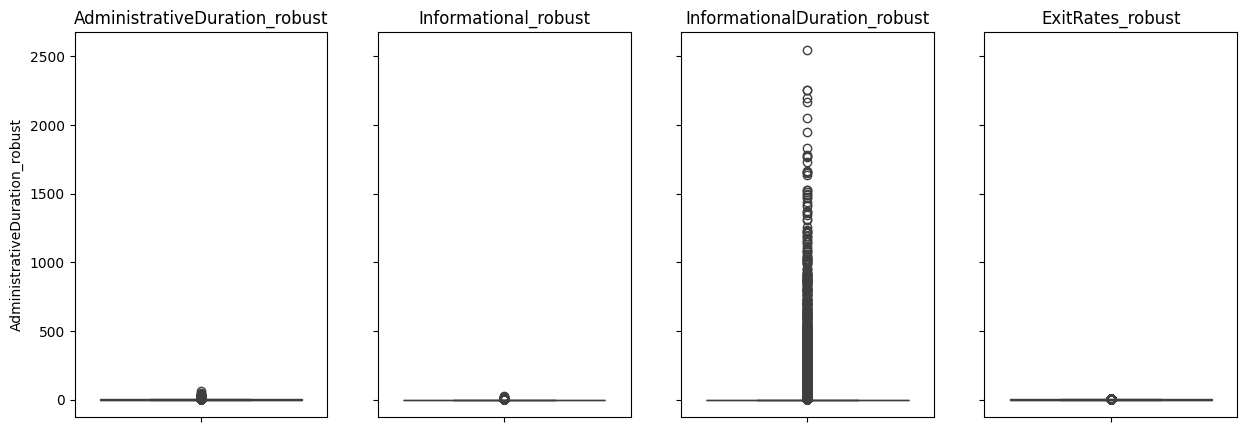

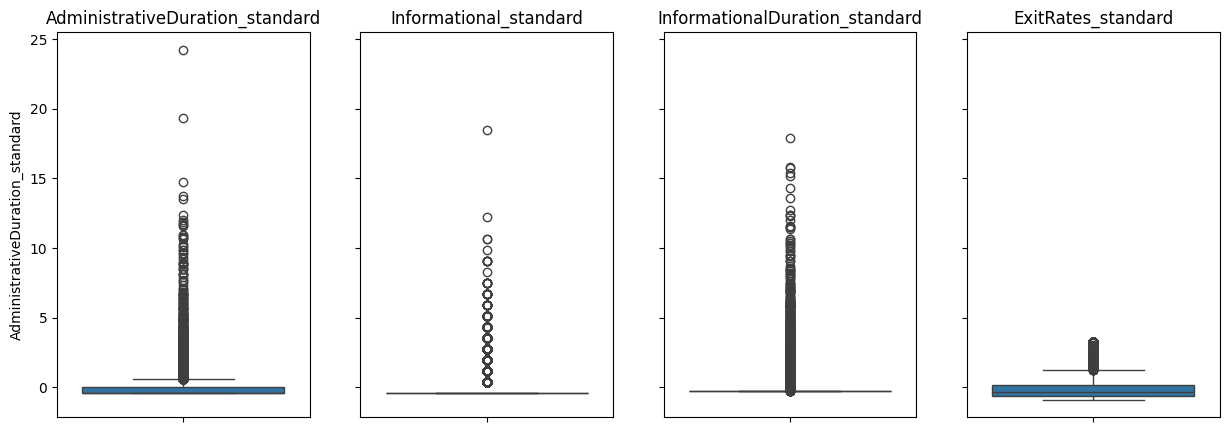

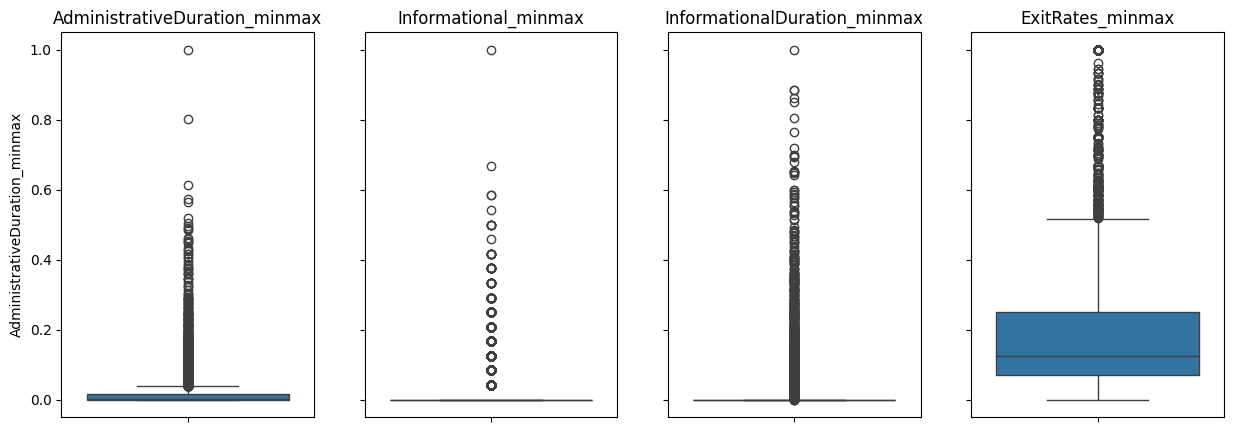

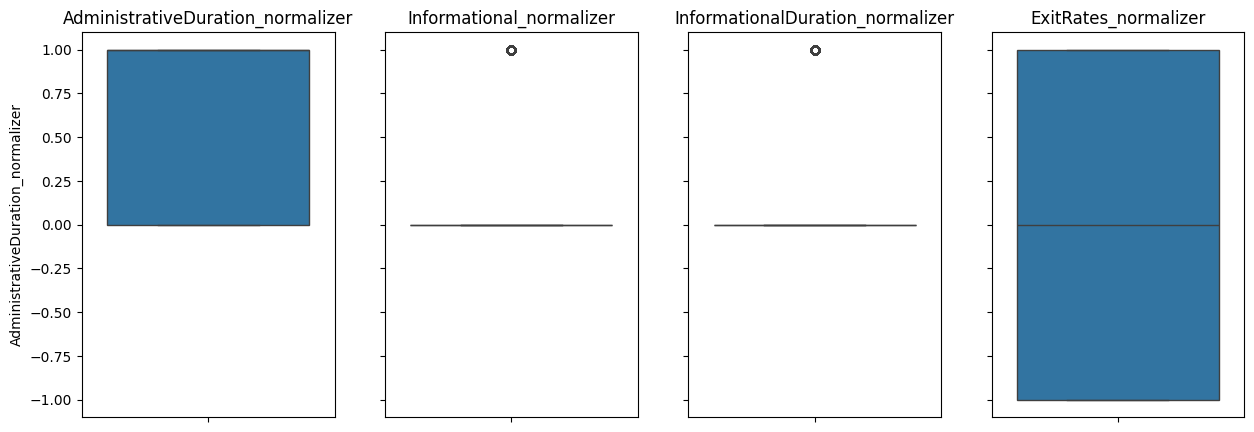

TypeError: Must pass either `items`, `like`, or `regex`

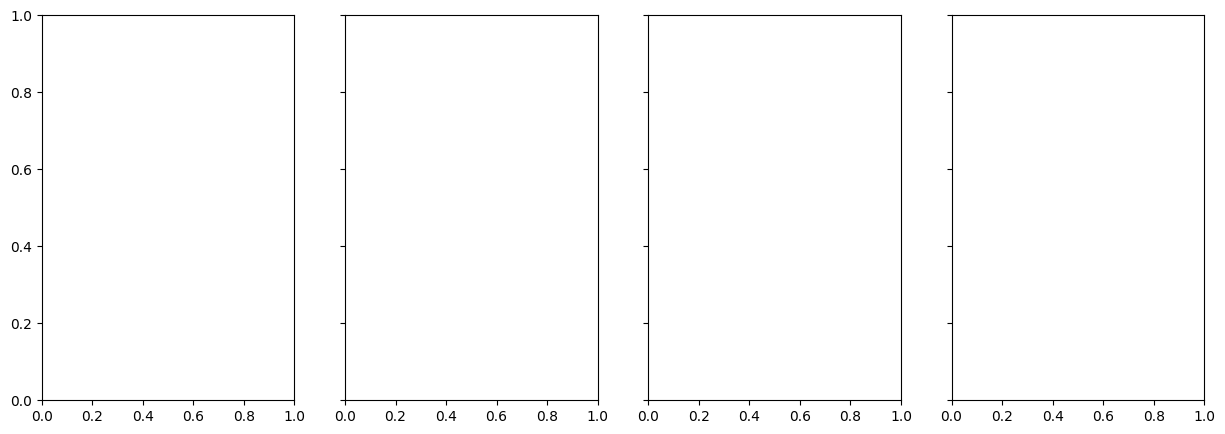

In [41]:
for transformacion in ["_robust","_standard","_minmax","_normalizer",""]:
    fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
    axes = axes.flat
    for ax, columa_transformada in zip(axes,shopper_intention.filter(like=transformacion)):
        ax.set_title(columa_transformada)
        sns.boxplot(data = shopper_intention,
                    y = columa_transformada,
                    ax=ax)
        # if transformacion == "_robust":
        #     ax.set_ylim(-0.5,40)
    plt.show()

    
fig, axes = plt.subplots(1,4, figsize=(15,5), sharey=True)
        
axes = axes.flat
for ax, columna in zip(axes,columnas):
    ax.set_title(columna)
    sns.boxplot(data = shopper_intention,
                y = columna,
                ax=ax)
    # if transformacion == "_robust":
    #     ax.set_ylim(-0.5,40)
plt.show()